APRENDIZAJE AUTOMATICO.

**Actividad 1**

El objetivo de esta actividad es encontrar una posible relación o linealidad entre el PIB
(Producto Interno Bruto) de diferentes países del mundo. Los datos fueron descargados
del sitio del Banco Mundial.

El método que seguiremos es el siguiente:

● Preparación y organización de datos

● Exploración de los datos

● Modelado de datos

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuramos estilo de gráficos
sns.set(style="whitegrid")


In [3]:
# Cargamos el archivo CSV
df_pib = pd.read_csv('/content/pib_banco_mundial_50.csv',sep=';')

# Mostramos las primeras filas
df_pib


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12
5,Germany,DEU,1.740500e+12,1.451500e+12,1.356700e+12,1.823800e+12,4.185000e+11
6,France,FRA,6.020000e+11,6.402000e+11,1.836300e+12,2.447700e+12,1.799200e+12
7,United Kingdom,GBR,2.299700e+12,1.399400e+12,7.928000e+11,1.191400e+12,2.180100e+12
8,Italy,ITA,7.559000e+11,2.445200e+12,7.028000e+11,1.006100e+12,1.090600e+12
9,Spain,ESP,3.763000e+11,4.963000e+11,5.665000e+11,6.679000e+11,7.281000e+11


In [11]:
# Exploración de datos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


Limpieza de columnas y conversión de tipos
python

Verificamos que no hay nulos y que los años ya están en formato float64


Graficar evolución del PIB por país

Vamos a graficar algunos países representativos para ver cómo evolucionó su PIB entre 2019 y 2023.

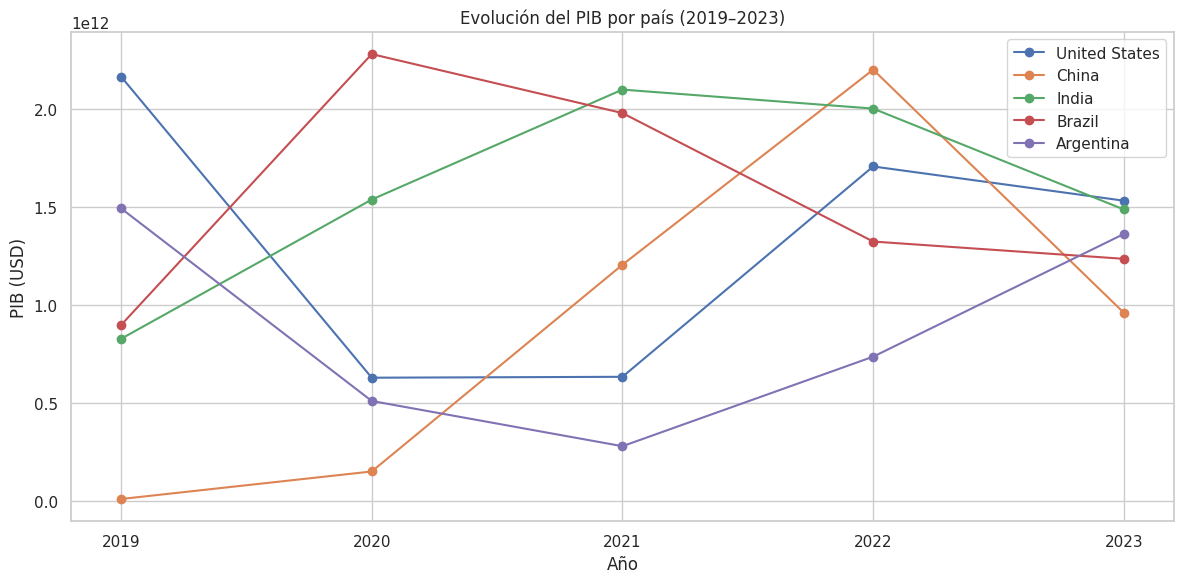

In [16]:
# Seleccionamos países para graficar
paises_a_graficar = ['United States', 'China', 'India', 'Brazil', 'Argentina']

# Transponemos para tener años como índice
df_plot = df_pib.set_index('Country Name').loc[paises_a_graficar].drop(columns='Country Code').T

# Convertimos el índice a tipo entero (años)
df_plot.index = df_plot.index.astype(int)

# Graficamos
plt.figure(figsize=(12,6))
for pais in df_plot.columns:
    plt.plot(df_plot.index, df_plot[pais], label=pais, marker='o')

plt.title('Evolución del PIB por país (2019–2023)')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.legend()
plt.tight_layout()
plt.xticks(df_plot.index)  # fuerza que solo se muestren los años reales
plt.show()


Calcular correlaciones con el PIB mundial
Primero verificamos si hay una fila o columna llamada 'World'. Si no está, podemos calcular una columna agregada como suma o promedio.

python

In [ ]:
# Extraemos la fila correspondiente a 'World'
fila_world = df_pib[df_pib['Country Name'] == 'World']

# Obtenemos los valores de PIB por año (excluyendo columnas no numéricas)
pib_mundial = fila_world.drop(columns=['Country Name', 'Country Code']).values.flatten()

pib_mundial


array([5.85757e+13, 6.45167e+13, 6.17213e+13, 6.39117e+13, 6.94809e+13])

Transponer el DataFrame para tener años como índice

In [ ]:
# Creamos DataFrame transpuesto con países como columnas y años como índice
df_corr = df_pib.drop(columns='Country Code').set_index('Country Name').T

# Convertimos el índice a tipo entero (años)
df_corr.index = df_corr.index.astype(int)

# Agregamos la columna 'World' como PIB mundial
df_corr['World'] = pib_mundial


Calcular correlaciones con el PIB mundial
python

Top países más correlacionados con el PIB mundial:
Country Name
Chile          0.882378
South Korea    0.877127
Spain          0.839181
Colombia       0.827016
Vietnam        0.758632
Portugal       0.739286
Finland        0.681315
Bolivia        0.601279
Japan          0.592790
Greece         0.529007
Name: World, dtype: float64


Text(0.5, 1.0, 'Correlaciones entre países y el PIB mundial')

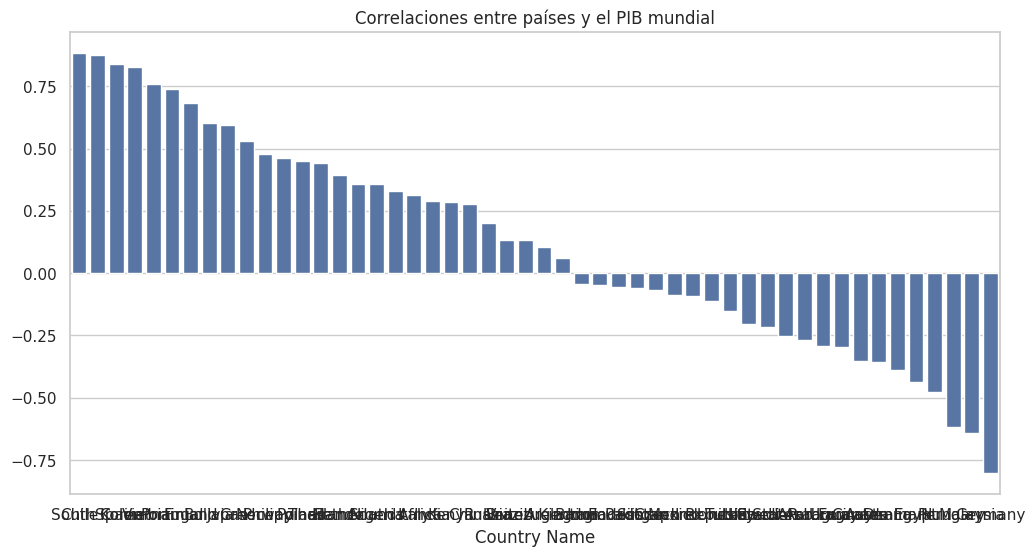

In [ ]:
# Calculamos correlaciones entre países y 'World'
correlaciones = df_corr.corr()['World'].sort_values(ascending=False)
correlaciones = correlaciones.drop('World')  # quitamos autocorrelación

# Mostramos los países más correlacionados
print("Top países más correlacionados con el PIB mundial:")
print(correlaciones.head(10))

# Graficar las correlacciones
plt.figure(figsize=(12,6))
sns.barplot(x=correlaciones.index, y=correlaciones.values)
plt.title('Correlaciones entre países y el PIB mundial')


Selección de países más correlacionados

In [ ]:
# Seleccionamos los 5 países más correlacionados con el PIB mundial
top_paises = correlaciones.head(5).index.tolist()
print("Países seleccionados:", top_paises)


Países seleccionados: ['Chile', 'South Korea', 'Spain', 'Colombia', 'Vietnam']


Preparación de variables para el modelo

In [ ]:
# X: PIB de los países seleccionados
X = df_corr[top_paises]

# y: PIB mundial (World)
y = df_corr['World']


División en entrenamiento y *prueba*

In [ ]:
from sklearn.model_selection import train_test_split

# 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Entrenamiento del modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

Predicción y evaluación

In [ ]:
# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de evaluación
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.2f}")


R²: -0.5880
MAE: 2,995,123,986,451.85
MSE: 9,783,193,645,521,546,755,702,784.00


Visualización del ajuste

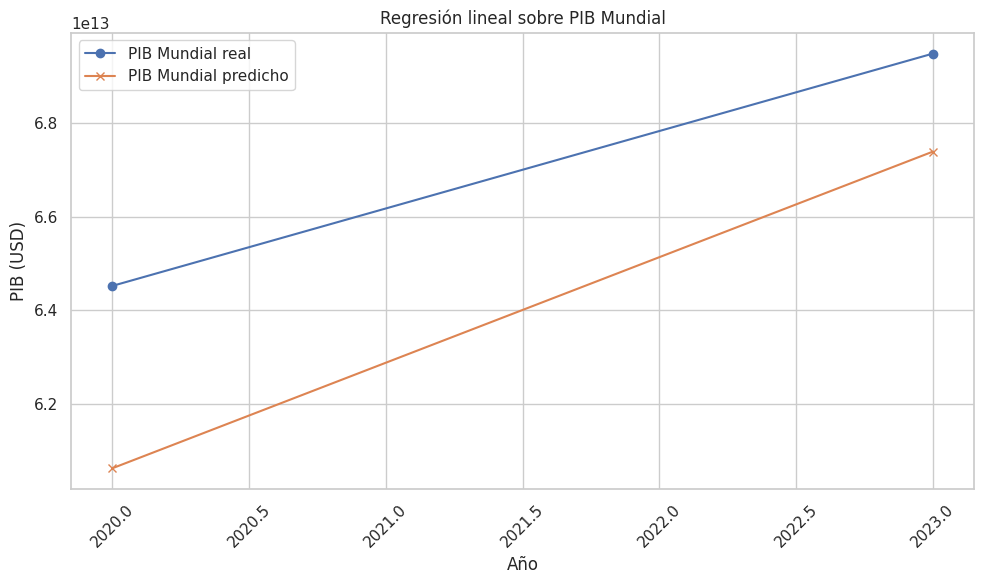

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='PIB Mundial real', marker='o')
plt.plot(y_test.index, y_pred, label='PIB Mundial predicho', marker='x')
plt.title('Regresión lineal sobre PIB Mundial')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Reflexión final sobre la Actividad 1
En esta actividad exploré la relación entre el PIB de distintos países y el PIB mundial utilizando regresión lineal. A partir del análisis de correlaciones, seleccioné los países más influyentes y entrené un modelo predictivo.

Aunque el modelo no logró explicar bien la variación del PIB mundial (R² negativo), el proceso fue valioso para entender cómo preparar datos reales, aplicar técnicas de aprendizaje automático y evaluar resultados con métricas concretas.

Detecté que la cantidad limitada de años afecta la capacidad del modelo para generalizar, y que la suma del PIB de países no siempre refleja el comportamiento global. Como mejora futura, podría incorporar más años, usar técnicas de regularización o explorar modelos no lineales.

Esta práctica me permitió consolidar el uso de pandas, scikit-learn y visualizaciones con matplotlib y seaborn, además de reforzar la importancia de interpretar los resultados más allá de las métricas.